In [1]:
import tensorflow as tf
print(tf.__version__)

# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

# Save the input and target variables
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis = 0)) / targets.std()

2.4.1
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information se

In [2]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.1)
train_data

array([[ 0.0562386 ,  0.05068012,  0.00996123, ...,  0.03430886,
         0.06078775,  0.03205916],
       [-0.01641217, -0.04464164, -0.01375064, ..., -0.03949338,
        -0.03581673, -0.03007245],
       [ 0.0090156 ,  0.05068012,  0.06924089, ...,  0.03430886,
         0.10329226,  0.07348023],
       ...,
       [ 0.01264814,  0.05068012, -0.02237314, ...,  0.03430886,
        -0.00608025, -0.0010777 ],
       [-0.00914709,  0.05068012,  0.00133873, ..., -0.00259226,
         0.02671426,  0.08176444],
       [ 0.04897352, -0.04464164, -0.04177375, ..., -0.0763945 ,
        -0.01290794,  0.01549073]])

In [3]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    return model

model = get_model()

In [4]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [19]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mae', metrics = tf.keras.metrics.RootMeanSquaredError())

In [20]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs = 100, 
                   validation_split = 0.15, batch_size = 64)

Epoch 1/100
6/6 [==============================] - 1s 45ms/step - loss: 0.2553 - root_mean_squared_error: 0.3521 - val_loss: 0.7052 - val_root_mean_squared_error: 1.0037
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 0.2440 - root_mean_squared_error: 0.3371 - val_loss: 0.7185 - val_root_mean_squared_error: 0.9244
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.1715 - root_mean_squared_error: 0.2264 - val_loss: 0.6879 - val_root_mean_squared_error: 0.9444
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.1585 - root_mean_squared_error: 0.2278 - val_loss: 0.7166 - val_root_mean_squared_error: 1.0058
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.1966 - root_mean_squared_error: 0.2625 - val_loss: 0.6873 - val_root_mean_squared_error: 0.9004
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.1435 - root_mean_squared_error: 0.2128 - val_loss: 0.7133 - val_root_mean_sq

In [21]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 6ms/step - loss: 0.6962 - root_mean_squared_error: 0.8172


[0.6962467432022095, 0.8172350525856018]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

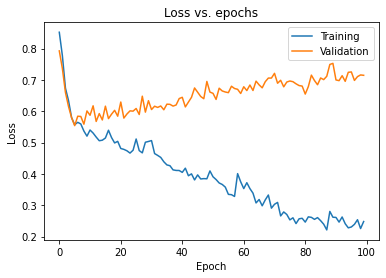

In [9]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [10]:
predictions = model.predict(test_data)

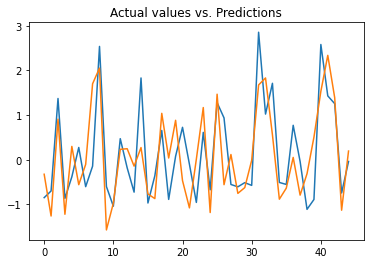

In [11]:
plt.plot(predictions)
plt.plot(test_targets)
plt.title('Actual values vs. Predictions')
plt.show()